# Preparing Probability Paper

This example highlight the concept for preparing a probability paper. For preparing a plotting paper of given data the function `probplot` from `scipy.stats` as done in `return_period_estimation` example code.

In this example we will see that how an axis is sclaed so that cumulative probability can be shown as a straight line on probability paper.

In [1]:
# Intialization: Import required libraries
import os

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Configuration for plotting
plt.style.use('ggplot')
plt.rcParams['text.usetex'] = True
FIGURE_FOLDER = os.path.join('output', 'figures')
os.makedirs(FIGURE_FOLDER, exist_ok=True)

Now, exponential distributed variable with different $\lambda$ parameters are generated. These values will then be plotted in later section.

In [2]:
# Global variables
cdfs = np.array([i/10 for i in range(10)] + [0.95, 0.975, 0.99])

f_cdf = -np.log(1-cdfs)
lambdas = [1/4, 1/6, 1/8]
lambdas.sort(reverse=True)
values = [stats.expon.ppf(cdfs, loc=0, scale=1/la)
          for la in lambdas]

## Cumulative Probability Distribution Plots

The cumulative probability for exponential distribution with mean $1/\lambda$ is given by:
$$F_X(x)=1-e^{(-\lambda x)}\qquad\qquad \text{for }x>0, \lambda>0$$

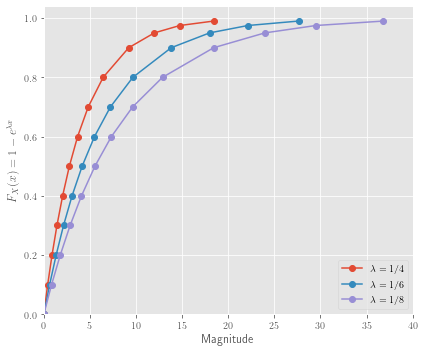

In [3]:
fig = plt.figure(figsize=[6, 5])
for val, la in zip(values, lambdas):
    plt.plot(val, cdfs, marker='o', label=f'$\lambda=1/{int(1/la)}$')
plt.legend(loc='lower right')
plt.xlabel('Magnitude')
plt.ylabel('$F_X(x)=1-e^{\lambda x}$')
plt.xlim([0, 40])
plt.ylim(0)
plt.grid(True)
plt.savefig(os.path.join(FIGURE_FOLDER, 'sample_exp_cdf_plot'), dpi=200)

## Probability Paper for exponential distribution

For plotting probability paper, we need to find a linear relationship between the variable $(x)$ and a function of cumulative probability $(F_X(x))$. As
$$F_X(x)=1-e^{(-\lambda x)}\qquad\qquad \text{for }x>0, \lambda>0$$

$$\text{Hence, }x = (1/\lambda)[-\log(1-F_X(x))]$$


In the following probability paper plot the function of cumulative probability (*i.e.* $-\log(1-F_X(x))$) is plotted on $X$-axis and the variable is plotted on $Y$-axis.

You can observed that after the transormation of the $X$-axis the cumulative probability are straight line over the probability paper.

Further, I have also shown the values of cumulative probability on top axis for reference.

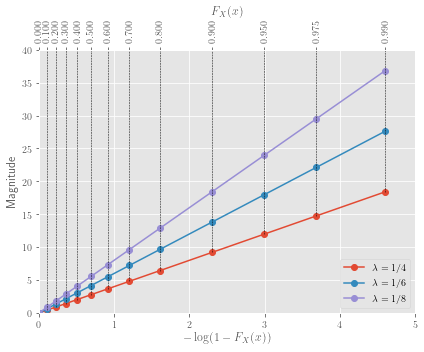

In [4]:
fig = plt.figure(figsize=[6, 5])
for val, la in zip(values, lambdas):
    plt.plot(f_cdf, val, marker='o', label=f'$\lambda=1/{int(1/la)}$')
plt.ylim([0, 40])
plt.ylabel('Magnitude')
plt.xlim([0, 5])
plt.xlabel('$-\log(1-F_X(x))$')
ax = plt.gca()
secax = ax.secondary_xaxis('top', functions=(lambda x: 1-np.exp(-x),
                                             lambda x: -np.log(1-x)))
secax.set_xlabel('$F_X(x)$')
secax.set_ticks(cdfs)
secax.tick_params(rotation=90)
plt.grid(True)
for fv, ym in zip(f_cdf, values[0]):
    ax.axvline(x=fv, ymin=ym/40, linewidth=0.5, color='k', linestyle='--')
plt.legend(loc='lower right')
plt.savefig(os.path.join(FIGURE_FOLDER, 'sample_exp_prob_paper'), dpi=200)